# Visualizing the mouse behavior

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

### Mouse data

In [2]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_9010_02192017.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_8020_02192017.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)

### HMM data

In [84]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_9010.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_8020.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_7030.csv',index_col=0)

## Collapse into single df

In [69]:
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'

datas = data90.append(data80)
datas = datas.append(data70)

In [70]:
datas.shape

(77487, 51)

# Compare prevalance of switches following reward

In [123]:
fontsize=20

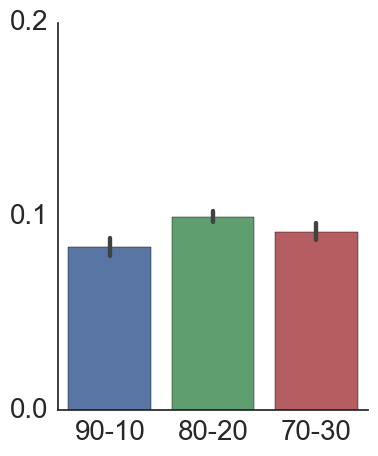

In [124]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas,n_boot = 1000,ci=95)
plt.ylim(0,0.2)
#plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.1,0.2],fontsize=fontsize)
#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

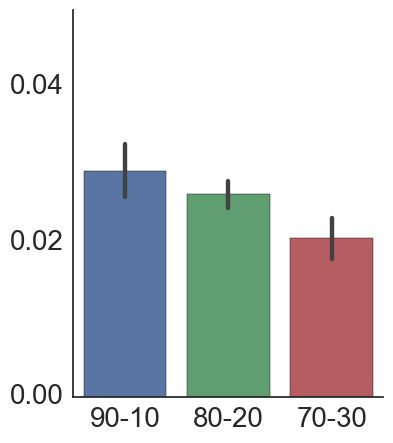

In [125]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.05)
#plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.02,0.04],fontsize=fontsize)
#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

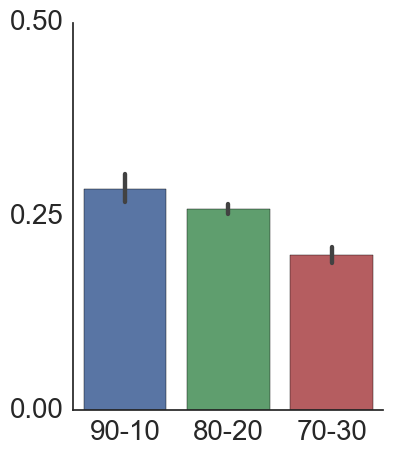

In [126]:
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==0],n_boot = 1000,ci=95)
plt.ylim(0,0.5)
#plt.title('p(switch) after unrewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.25,0.5],fontsize=fontsize)
#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

In [31]:
d = data.head(20).copy()
d.head(5)

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition
0,K1,11042016_K1,11.0,9.0,-1.0,0.0,0.0,15.781,1.542,1.0,...,1.0,0.0,1.346,0.674,1.087,1.0,0.0,1.0,1.0,90-10
1,K1,11042016_K1,12.0,10.0,1.0,1.0,1.0,3.252,0.880,1.0,...,1.0,1.0,1.087,0.574,1.584,1.0,0.0,1.0,1.0,90-10
2,K1,11042016_K1,13.0,10.0,2.0,1.0,1.0,1.294,0.805,1.0,...,1.0,1.0,1.584,0.646,5.985,1.0,0.0,1.0,1.0,90-10
3,K1,11042016_K1,14.0,10.0,3.0,1.0,1.0,2.992,0.787,1.0,...,1.0,1.0,5.985,0.552,1.062,1.0,0.0,1.0,1.0,90-10
4,K1,11042016_K1,15.0,10.0,4.0,1.0,1.0,1.058,0.689,1.0,...,1.0,1.0,1.062,0.664,1.122,1.0,0.0,1.0,0.0,90-10


['70-30' '80-20' '90-10']


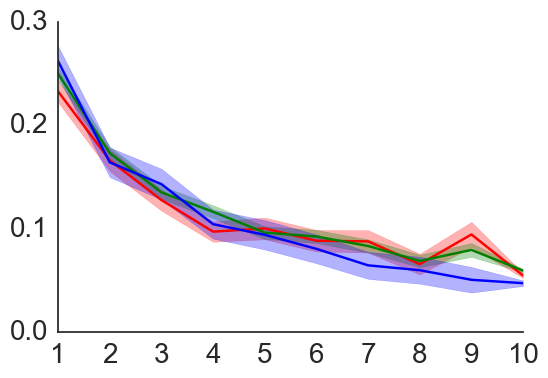

In [128]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['red','green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    #plt.xlabel('Port Streak',fontsize=fontsize)
    #plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)


sns.despine()

In [68]:
reward_streaks

array([-11.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  11.])

In [79]:
data70[data70['Reward Streak'] == streak]

,Mouse ID,Session ID,Block Trial,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,9_Port,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,Decision,Switch,Higher p port,Reward,Condition


['70-30' '80-20' '90-10']


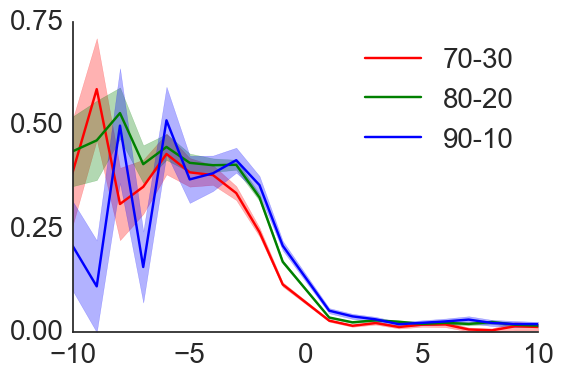

In [127]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['red','green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    reward_streaks = np.unique(data['Reward Streak'].values)
    p_switch = np.zeros((reward_streaks.shape[0],2))

    for i,streak in enumerate(reward_streaks):
            switches = data[data['Reward Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(reward_streaks,p_switch[:,0],color=colors[j],label=condition)
    plt.fill_between(x=reward_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    #plt.xlabel('Reward Streak',fontsize=fontsize)
    #plt.ylabel('p(switch)',fontsize=fontsize)
    plt.yticks([0,0.25,0.5,0.75],fontsize=fontsize)
    plt.xticks(fontsize=20)
    plt.xlim(-10,10)
    plt.legend(loc='best',fontsize=fontsize)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=20)


    sns.despine()